### Import Required Packages

In [1]:
## pip install pandas_datareader

### Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load the Bitcoin USD Data from "Yahoo Finance"

In [3]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2021,1,2)
end = dt.datetime(2022,9,30)

## BTC data from Jan 1, 2021 to Sept 30, 2022
bitcoin_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)
print(bitcoin_data)

                    High           Low          Open         Close  \
Date                                                                 
2021-01-01  29600.626953  28803.585938  28994.009766  29374.152344   
2021-01-02  33155.117188  29091.181641  29376.455078  32127.267578   
2021-01-03  34608.558594  32052.316406  32129.408203  32782.023438   
2021-01-04  33440.218750  28722.755859  32810.949219  31971.914062   
2021-01-05  34437.589844  30221.187500  31977.041016  33992.429688   
...                  ...           ...           ...           ...   
2022-09-26  19274.873047  18721.285156  18803.900391  19222.671875   
2022-09-27  20338.455078  18915.667969  19221.839844  19110.546875   
2022-09-28  19688.343750  18553.296875  19104.621094  19426.720703   
2022-09-29  19589.265625  18924.353516  19427.779297  19573.050781   
2022-09-30  20109.849609  19265.662109  19573.431641  19431.789062   

                 Volume     Adj Close  
Date                                   
2021-01-0

### Data visualization

Text(0.5, 1.0, 'Bitcoin Price Distribution')

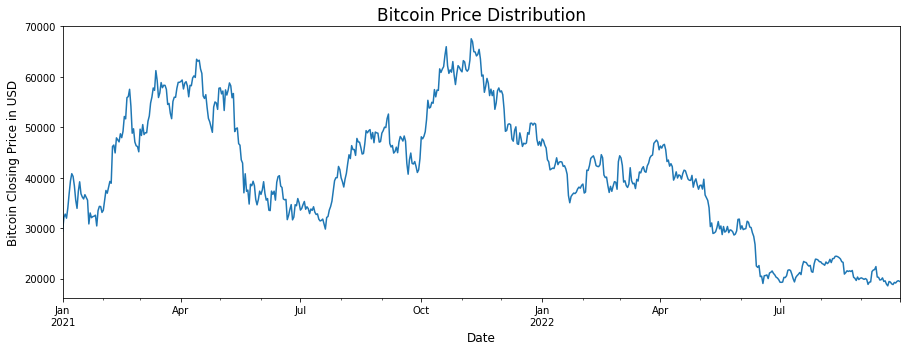

In [4]:
# Ploting the Bitcoin Closing Price distribution over time

bitcoin_data['Close'].plot(figsize =(15,5))
plt.xlabel("Date",fontsize=12)
plt.ylabel("Bitcoin Closing Price in USD", fontsize=12)
plt.title("Bitcoin Price Distribution", fontsize=17)

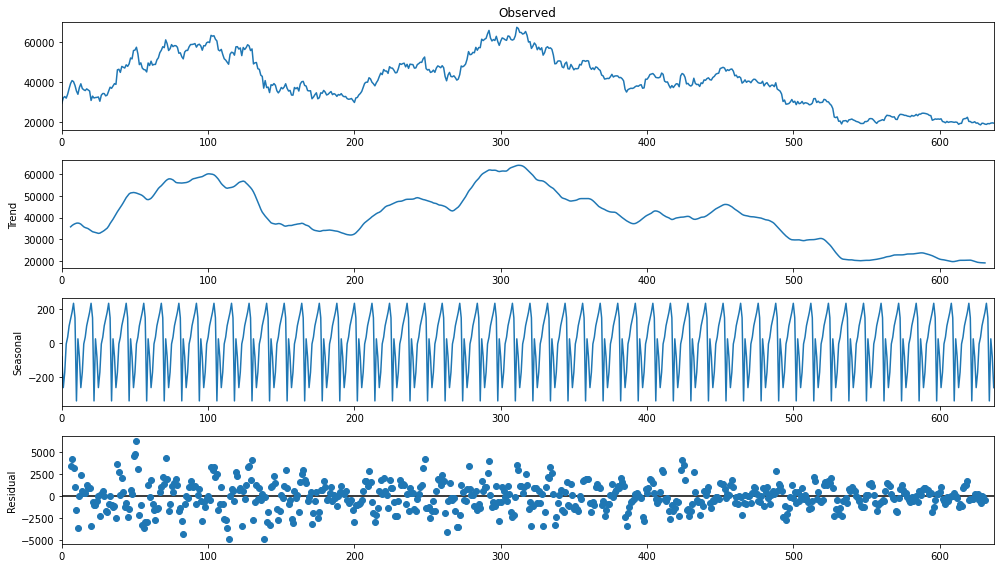

In [5]:
## **Decomposition - Time Series Components**
### Additive:  y(t) = Level + Trend + Seasonality + Noise
### Multiplicative: y(t) = Level * Trend * Seasonality * Noise

from statsmodels.tsa.seasonal import seasonal_decompose
series = list(bitcoin_data['Close'])
result = seasonal_decompose(series, model='additive', period=12)

fig = result.plot()
fig.set_size_inches((14, 8))
fig.tight_layout()
plt.show()

## here "Observed" value = "Trend" + "Seasonal" + "Residual"

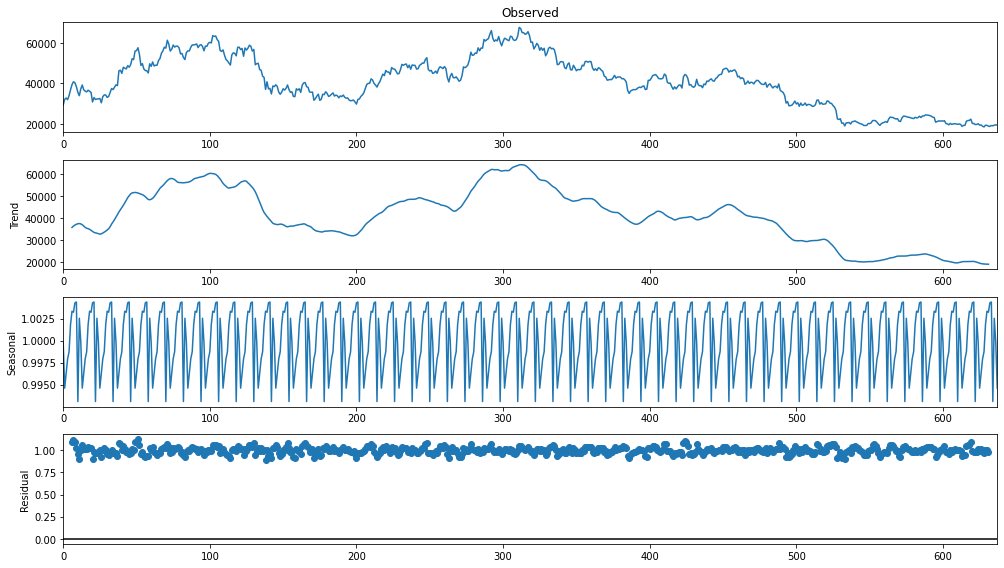

In [6]:
series = list(bitcoin_data['Close'])
result = seasonal_decompose(series, model='multiplicative', period=12)

fig = result.plot()
fig.set_size_inches((14, 8))
fig.tight_layout()
plt.show()

## "Additive" model fits better than "Multiplicative" beacause in Multiplicative, residual error is on high side and constant (close to 1).

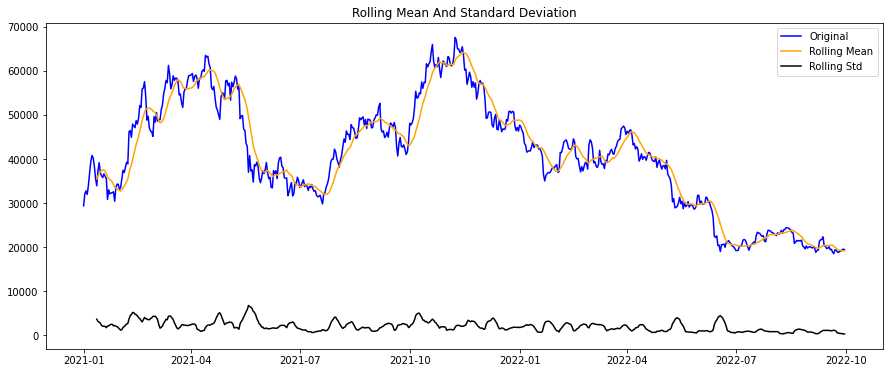

Results of Dickey-fuller test:
Test Statistic                  -1.328782
p-value                          0.615904
#Lags Used                       0.000000
Number of Observations Used    637.000000
Critical Value (1%)             -3.440657
Critical Value (5%)             -2.866088
Critical Value (10%)            -2.569192
dtype: float64


In [7]:
## Data Stationarity Check
#### ADCF Test 

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistic:
    movingAverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistic:
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'orange', label = 'Rolling Mean')
    std = plt.plot(movingstd, color = 'black', label = 'Rolling Std')
    plt.title('Rolling Mean And Standard Deviation')
    plt.legend(loc = 'best')
    plt.show(block = False)
    
    # Perform Dickey-fuller test:
    print('Results of Dickey-fuller test:')
    dftest = adfuller(bitcoin_data['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(bitcoin_data['Close'])
    
## P-value is not less than 0.05, means the data is not stationary (additionaly, seasonal data can't be stationary)

### Data Transformation

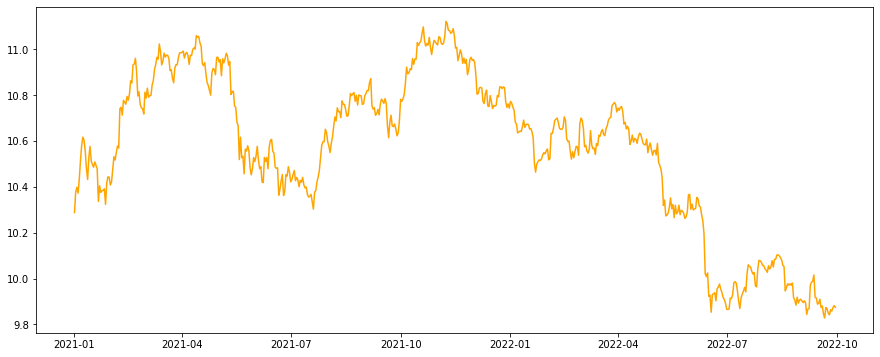

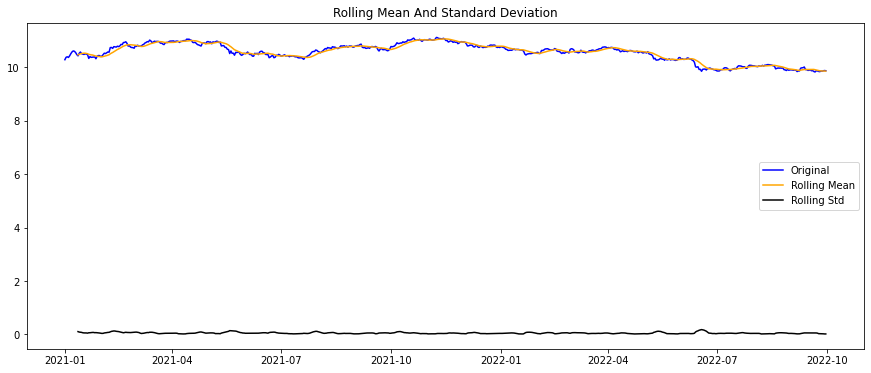

Results of Dickey-fuller test:
Test Statistic                  -0.730535
p-value                          0.838681
#Lags Used                       1.000000
Number of Observations Used    636.000000
Critical Value (1%)             -3.440674
Critical Value (5%)             -2.866095
Critical Value (10%)            -2.569196
dtype: float64


In [8]:
## "Closing Price" log-transformation for estimating the trend and to make the data stationarity

bitcoin_logdata = np.log(bitcoin_data)
plt.figure(figsize=(15,6))
plt.plot(bitcoin_logdata['Close'], color = "orange")
plt.show() #the trend remains same as original data set

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistic:
    movingAverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistic:
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'orange', label = 'Rolling Mean')
    std = plt.plot(movingstd, color = 'black', label = 'Rolling Std')
    plt.title('Rolling Mean And Standard Deviation')
    plt.legend(loc = 'best')
    plt.show(block = False)
    
    # Perform Dickey-fuller test:
    print('Results of Dickey-fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(bitcoin_logdata['Close'])

## P-value is not less than 0.05 (threshold value), means the data is still not stationary

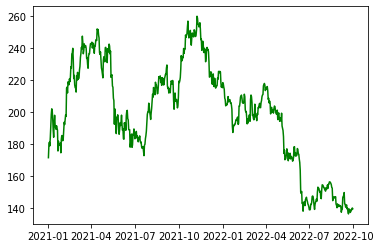

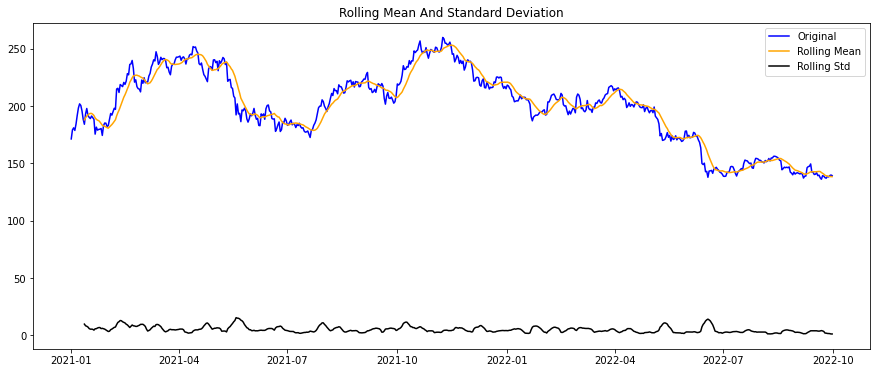

Results of Dickey-fuller test:
Test Statistic                  -1.105377
p-value                          0.712923
#Lags Used                       0.000000
Number of Observations Used    637.000000
Critical Value (1%)             -3.440657
Critical Value (5%)             -2.866088
Critical Value (10%)            -2.569192
dtype: float64


In [9]:
## "Closing Price" square root-transformation for estimating the trend and Stationary check

bitcoin_sqrtdata = np.sqrt(bitcoin_data)
plt.plot(bitcoin_sqrtdata['Close'], color = "green")
plt.show()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistic:
    movingAverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistic:
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'orange', label = 'Rolling Mean')
    std = plt.plot(movingstd, color = 'black', label = 'Rolling Std')
    plt.title('Rolling Mean And Standard Deviation')
    plt.legend(loc = 'best')
    plt.show(block = False)
    
    # Perform Dickey-fuller test:
    print('Results of Dickey-fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(bitcoin_sqrtdata['Close'])

## p-value is not less than 0.05, means the squared root data is not stationary

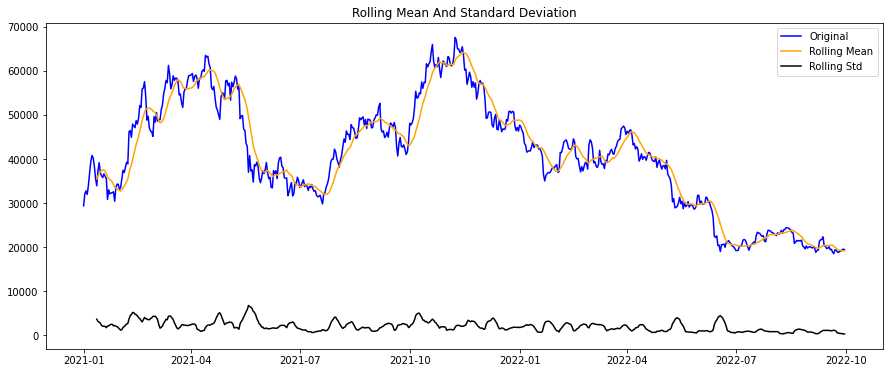

Results of Dickey-fuller test:
Test Statistic                 -26.144027
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    636.000000
Critical Value (1%)             -3.440674
Critical Value (5%)             -2.866095
Critical Value (10%)            -2.569196
dtype: float64


In [10]:
## "Closing Price" 1st difference transformation

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistic:
    movingAverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistic:
    plt.figure(figsize=(15,6))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'orange', label = 'Rolling Mean')
    std = plt.plot(movingstd, color = 'black', label = 'Rolling Std')
    plt.title('Rolling Mean And Standard Deviation')
    plt.legend(loc = 'best')
    plt.show(block = False)
    
    # Perform Dickey-fuller test:
    print('Results of Dickey-fuller test:')
    dftest = adfuller(timeseries.diff()[1:], autolag='AIC') ## Differencing by 1 order
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(bitcoin_data['Close'])

- In the above plot,
  - p-value is less than 0.05 but Rolling Std is far away from Rolling mean and also Test Statistic value is not close to Critical Value and so the data is not stationary

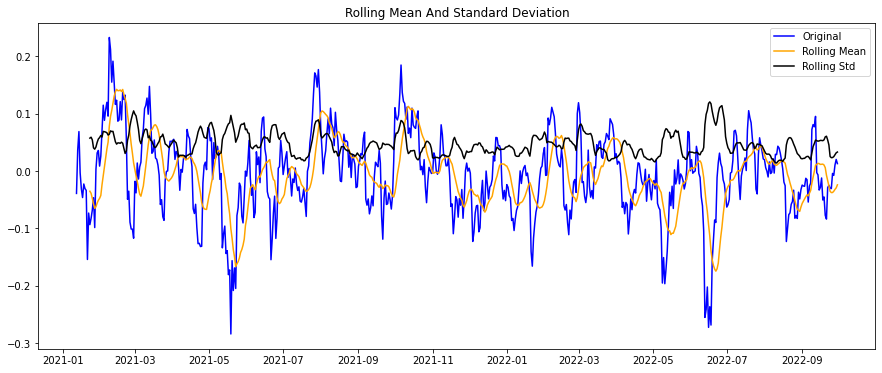

Results of Dickey-fuller test:
Test Statistic                -8.980150e+00
p-value                        7.347451e-15
#Lags Used                     1.800000e+01
Number of Observations Used    6.070000e+02
Critical Value (1%)           -3.441169e+00
Critical Value (5%)           -2.866313e+00
Critical Value (10%)          -2.569312e+00
dtype: float64


In [11]:
## Logdata - movingAverage data Stationary check

#Determing rolling statistic based on log data:

movingAverage = bitcoin_logdata.rolling(window=12).mean() # shifting for 12 months (window = 12)
movingSTD = bitcoin_logdata.rolling(window=12).std()

##Log data - movingAverage
bitcoin_logdata_minus_ma = bitcoin_logdata - movingAverage
bitcoin_logdata_minus_ma.head(12)

#Remove NAN values
bitcoin_logdata_minus_ma.dropna(inplace=True)

## Check data stationarity
test_stationarity(bitcoin_logdata_minus_ma['Close'])

- In the above plot
  - p-value is less than 0.05
  - Rolling Std is close to Rolling mean
  - Also Test Statistic value is not that far away from Critical Value. So we can say this data is stationary

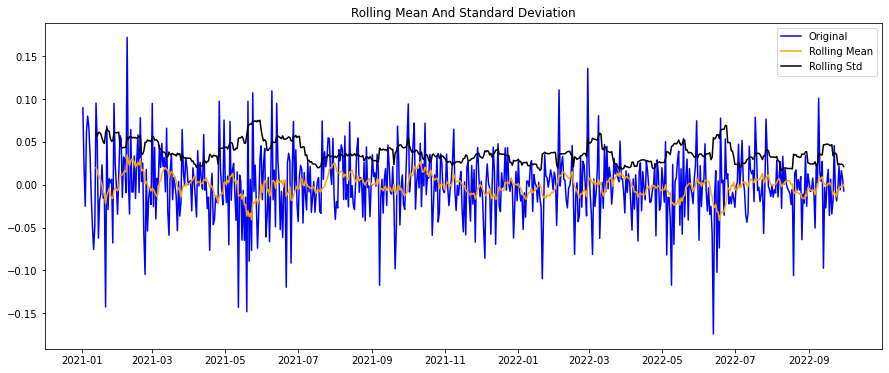

Results of Dickey-fuller test:
Test Statistic                -9.757530e+00
p-value                        7.717945e-17
#Lags Used                     1.800000e+01
Number of Observations Used    6.170000e+02
Critical Value (1%)           -3.440993e+00
Critical Value (5%)           -2.866236e+00
Critical Value (10%)          -2.569271e+00
dtype: float64


In [12]:
### "Closing Price" log data transformation with differencing 1
## Remove trend and seasonality with differencing

bitcoin_logdata_diff = bitcoin_logdata - bitcoin_logdata.shift()

bitcoin_logdata_diff.dropna(inplace=True)
test_stationarity(bitcoin_logdata_diff['Close'])

- In the above plot
  - p-value is less than 0.05
  - Rolling Std is close to Rolling mean
  - Also Test Statistic value is not that far away from Critical Value.
- It derived that the time series is stationary by doing log data transformation with differencing 1 and so **d (differencing order) would be 1**

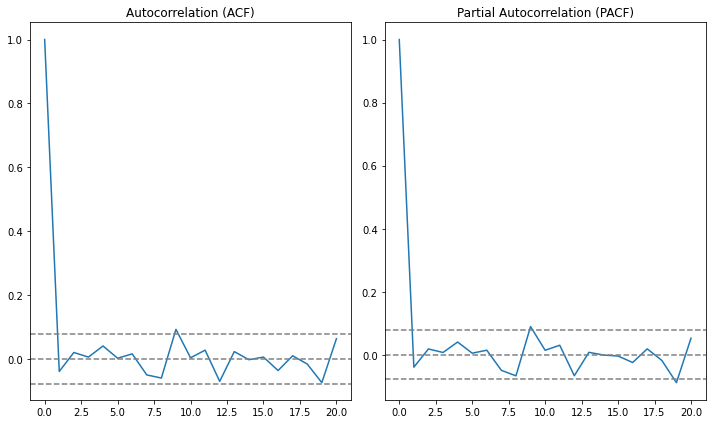

In [13]:
## Let's plot the ACF and PACF plots with stationary data to get p (AR Model) and q (MA Model) values

from statsmodels.tsa.stattools import acf, pacf

lag_pacf = pacf(bitcoin_logdata_diff['Close'], nlags=20, method = 'ols')
lag_acf = acf(bitcoin_logdata_diff['Close'], nlags=20)

#Plot ACF
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Autocorrelation (ACF)')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bitcoin_logdata_diff['Close'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bitcoin_logdata_diff['Close'])),linestyle='--',color='gray')

#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation (PACF)')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bitcoin_logdata_diff['Close'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bitcoin_logdata_diff['Close'])),linestyle='--',color='gray')
plt.tight_layout()



- PACF can be used to define the best order of AR Model (p value) and ACF is used to define  the best order of the MA Model (q value)
- From the above PACF and ACF plots, we get 1 significant value (vertical line which exceeds the horizontal grey dashed lines) for PACF and ACF and so **p and q would be 1**. In thi case, only 1 vertical line is exceeding horizontal line.

### Train Test Data Split

In [14]:
## Train Data (Jan 2021 to Aug 2022) and Test Data (Sept 2022)

train_data = list(bitcoin_logdata[:-30]['Close'])
test_data = list(bitcoin_logdata[-30:]['Close'])

training_data = bitcoin_logdata[:-30]['Close']
testing_data = bitcoin_logdata[-30:]['Close']

print('Train Data:')
print(train_data)
print('Test Data:')
print(test_data)

Train Data:
[10.287870394647127, 10.377460405795935, 10.397635578199328, 10.372613110843512, 10.433893122556716, 10.513914950787596, 10.580785875046123, 10.616378764925573, 10.602978242305058, 10.554677756348193, 10.479163855744467, 10.431847377885637, 10.527187098621894, 10.576108711400746, 10.513942212428438, 10.496210365284819, 10.48545949308548, 10.508624881944709, 10.493211359064516, 10.478632142089177, 10.336104011270818, 10.40443742274612, 10.37560278135185, 10.382493628703594, 10.384875897340384, 10.391142280801068, 10.32326793557666, 10.418288195123829, 10.443378265971647, 10.442011708658745, 10.407722285269173, 10.420409827337169, 10.477577766216589, 10.531351664018128, 10.516672987314305, 10.549131840622739, 10.57811458190387, 10.568837993720464, 10.740658555608588, 10.74680117499404, 10.712597971564412, 10.777065587622806, 10.768587122964881, 10.76014537771306, 10.793789257619299, 10.777811021690487, 10.803646282431236, 10.861860434600757, 10.852822208011453, 10.93110734344

### Model Building, Prediction and Evaluation

In [37]:
## ARIMA Model building and prediction

model_predictions_logdata_withdiff1 = []
n_test_obser = len(test_data)

from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (1,1,1)) 
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions_logdata_withdiff1.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

print(model_fit.summary())
print(yhat)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  757
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1391.895
Date:                Sat, 08 Oct 2022   AIC                          -2777.790
Time:                        19:46:17   BIC                          -2763.906
Sample:                             0   HQIC                         -2772.442
                                - 757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3539      0.639     -0.554      0.580      -1.607       0.899
ma.L1          0.3054      0.652      0.469      0.639      -0.972       1.583
sigma2         0.0015   5.21e-05     28.273      0.0

In [38]:
## Convert the log data back to original form

model_predictions_logdata_withdiff1_converted_form = np.exp(model_predictions_logdata_withdiff1)
test_data_original_form = np.exp(test_data)

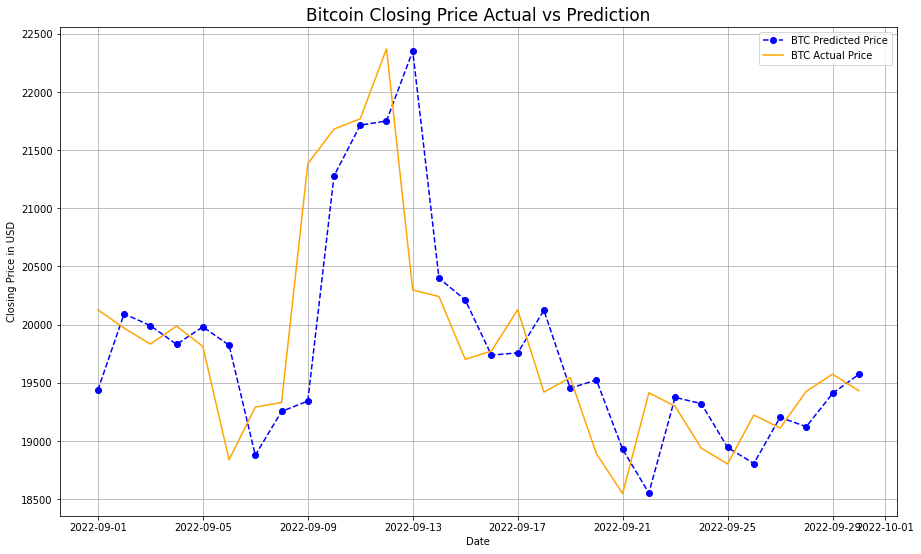

In [39]:
# Plot Actual Test Data vs Prediction Data

plt.figure(figsize=(15,9))
plt.grid(True)

date_range = bitcoin_data[-30:].index

plt.plot(date_range, model_predictions_logdata_withdiff1_converted_form, color = 'blue', marker ='o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, test_data_original_form, color = 'orange', label = 'BTC Actual Price')
plt.title('Bitcoin Closing Price Actual vs Prediction', fontsize = 17)
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
                                       
plt.legend()
plt.show()      

In [40]:
## RMSE for 30 days test data (Sept 2022)

from math import sqrt
rmse = sqrt(mean_squared_error(model_predictions_logdata_withdiff1_converted_form,test_data_original_form))
rmse

667.132635920283

In [41]:
## RMSE for 1 day (Sept 30)

from math import sqrt
rmse = sqrt(mean_squared_error(model_predictions_logdata_withdiff1_converted_form[-1:],test_data_original_form[-1:]))
rmse

140.04076334114507